# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [2]:
def round2(x):
    xr = round(x,2)
    return xr

# Extract Data

In [3]:
compData = pd.read_csv('complaints-2022-02-12_11_08.csv')

# Exploritory Data Analysis

In [4]:
compData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64440 entries, 0 to 64439
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 64440 non-null  object 
 1   Product                       64440 non-null  object 
 2   Sub-product                   64440 non-null  object 
 3   Issue                         64440 non-null  object 
 4   Sub-issue                     64440 non-null  object 
 5   Consumer complaint narrative  3463 non-null   object 
 6   Company public response       64440 non-null  object 
 7   Company                       64440 non-null  object 
 8   State                         64440 non-null  object 
 9   ZIP code                      64440 non-null  object 
 10  Tags                          64440 non-null  object 
 11  Consumer consent provided?    60219 non-null  object 
 12  Submitted via                 64440 non-null  object 
 13  D

In [5]:
compData.head(3)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,02/05/22,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,None,"EQUIFAX, INC.",IL,60429,None,None,Web,02/05/22,Closed with explanation,Yes,NaN,5189815
1,02/03/22,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,None,"EQUIFAX, INC.",NJ,07203,None,None,Web,02/03/22,Closed with explanation,Yes,NaN,5181709
2,01/25/22,Debt collection,Medical debt,Communication tactics,"Used obscene, profane, or other abusive language",NaN,Company disputes the facts presented in the co...,"Professional Finance Company, Inc.",NM,87501,None,None,Web,01/25/22,Closed with non-monetary relief,Yes,NaN,5150633


# Filter TX Data

In [6]:
compData.State.unique()

array(['IL', 'NJ', 'NM', 'FL', 'KS', 'CA', 'TX', 'GA', 'VA', 'NY', 'OH',
       'DE', 'MS', 'PA', 'LA', 'MI', 'NC', 'AZ', 'AL', 'MD', 'TN', 'CO',
       'WI', 'IN', 'MN', 'UT', 'OR', 'MA', 'CT', 'None', 'SC', 'WV', 'MO',
       'WA', 'ID', 'RI', 'DC', 'OK', 'NV', 'ME', 'NE', 'PR', 'KY', 'AR',
       'NH', 'VI', 'IA', 'HI', 'ND', 'SD', 'GU', 'AP', 'WY', 'VT', 'MT',
       'AK', 'AE', 'UNITED STATES MINOR OUTLYING ISLANDS', 'MP'],
      dtype=object)

In [7]:
texCompData = compData[compData['State'] == 'TX'].copy()

# Create Frequency Table

In [8]:
freqTable = (
                pd.crosstab(index = texCompData['Issue'],
                columns = 'Absolute Frequency')
                .sort_values(by = 'Absolute Frequency',ascending=False)
            )

# Check The Count of Unique Issues

In [9]:
len(freqTable.index)

63

# Calcuate Relative Frequency

In [10]:
freqTable['Relative Frequency'] = (
                                    freqTable['Absolute Frequency']
                                  / sum(freqTable['Absolute Frequency']) 
                                  * 100
                                  )

# Condense Issues

In [11]:
lenOfOthers = len(freqTable[freqTable['Relative Frequency'] < 0.71].values)

In [12]:
others = sum(freqTable[freqTable['Relative Frequency'] < 0.71].values)

# Filter Issue DataFrame

In [13]:
freqTable2 = freqTable[freqTable['Relative Frequency'] > 0.71].copy()

# Add Others Row to Exising DataFrame

In [14]:
freqTable2.loc[len(freqTable2)] = others

# Rename Index

In [15]:
freqTable2.rename(index={len(freqTable2) - 1: 'Others'}, inplace = True)

# Calculate Cumulative Frequency

In [16]:
freqTable2['Cumulative Frequency'] = freqTable2['Relative Frequency'].cumsum()

# Create Issue ID Column

In [17]:
freqTable2.insert(0,'Issue ID',np.arange(1,len(freqTable2) + 1))

# Visualize Frequency Table

In [18]:
freqTable2 = freqTable2.apply(round2,axis=1)

In [19]:
freqTable2 = freqTable2.astype({'Issue ID':int,
                                'Absolute Frequency':int})

In [20]:
freqTable2

col_0,Issue ID,Absolute Frequency,Relative Frequency,Cumulative Frequency
Issue,,,,
Incorrect information on your report,1,3462,46.17,46.17
Problem with a credit reporting company's investigation into an existing problem,2,1944,25.93,72.10
Improper use of your report,3,484,6.46,78.55
Attempts to collect debt not owed,4,338,4.51,83.06
Written notification about debt,5,200,2.67,85.73
Managing an account,6,137,1.83,87.56
Trouble during payment process,7,79,1.05,88.61
Unable to get your credit report or credit score,8,68,0.91,89.52
False statements or representation,9,59,0.79,90.30


# Create Color List

In [21]:
clrs = ['orange' if x == 'Others' else 'Green' for x in freqTable2.index]

# Visualize The Data

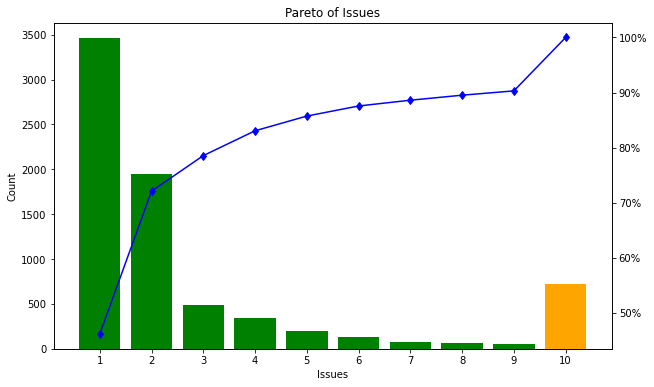

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x= freqTable2['Issue ID'], height=freqTable2['Absolute Frequency'], color=clrs)
ax.set_xlabel('Issues')
ax.set_ylabel('Count')
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.plot(freqTable2['Issue ID'], freqTable2['Cumulative Frequency'], marker='d', color='blue')
plt.title('Pareto of Issues')
plt.xticks(ticks = np.arange(min(freqTable2['Issue ID'].values),max(freqTable2['Issue ID'].values) + 1))
plt.xticks(rotation=25)
plt.show()

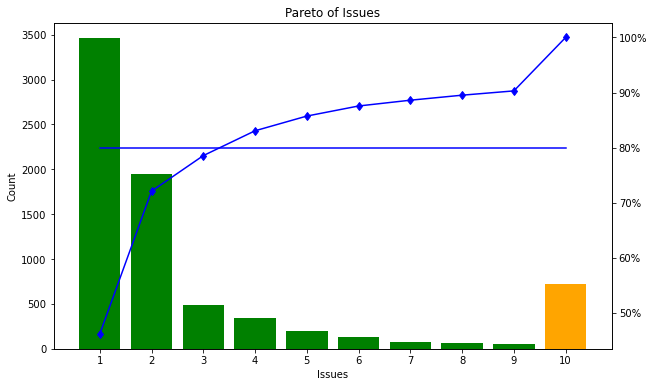

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x= freqTable2['Issue ID'], height=freqTable2['Absolute Frequency'], color=clrs)
ax.set_xlabel('Issues')
ax.set_ylabel('Count')
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.plot(freqTable2['Issue ID'], freqTable2['Cumulative Frequency'], marker='d', color='blue')
plt.plot(freqTable2['Issue ID'], (80,80,80,80,80,80,80,80,80,80),color='blue')
plt.title('Pareto of Issues')
plt.xticks(ticks = np.arange(min(freqTable2['Issue ID'].values),max(freqTable2['Issue ID'].values) + 1))
plt.xticks(rotation=25)
plt.show()